In [1]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import sys
sys.path.append("C:/Documents/Qishi_QR")
import Utils.MajorContract_Offsets
import importlib

importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation

importlib.reload(Backtesting.Vectorized.lm_validation)

from Backtesting.Vectorized.lm_validation import LmValidation

## Ru. Freq=5.

In [3]:
freq=5

In [4]:
offset = [0.1+i for i in range(5)]

In [5]:
offset

[0.1, 1.1, 2.1, 3.1, 4.1]

In [7]:
ru_train, ru_test, ru_probability_table = MajorContracts(symbol='ru', split_time = '2016-7-1', topdir=r'../Data',
                                          maturity={'1605':['2015-11-1','2016-3-31'],
                                                    '1609':['2016-3-1','2016-8-31'],
                                                    '1701':['2016-8-1','2016-11-30'],
                                                    '1705':['2016-11-1', '2017-3-31']
                                                   },
                                          transitions = {'1605':'2016-3-17', '1609':'2016-8-1', '1701':'2016-11-24',
                                                        '1705':'2017-3-17'},
                                          freq = freq, offset = offset).create_major_overlap()


ru1605 ../Data/ru
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-17 00:00:00
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
ru1609 ../Data/ru
ID trade_range transition_begin transition_end
1609 ['2016-3-1', '2016-8-31'] 2016-03-17 00:00:00 2016-08-01 00:00:00
probability table:  20160317.0 20160630.0
probability table:  20160317.0 20160630.0
probability table:  20160317.0 20160630.0
probability table:  20160317.0 20160630.0
probability table:  20160317.0 20160630.0
ru1701 ../Data/ru
ID trade_range transition_begin transition_end
1701 ['2016-8-1', '2016-11-30'] 2016-08-01 00:00:00 2016-11-24 00:00:00
ru1705 ../Data/ru
ID trade_range transition_begin transition_end
1705 ['2016-11-1', '2017-3-31'] 2016-11-24 00:00:00 2016-12-31 00:00:00


In [10]:
ru_test.keys()

dict_keys(['0.1', '1.1', '2.1', '3.1', '4.1'])

In [11]:
ru_probability_table.keys()

dict_keys(['1605', '1609', '1701', '1705'])

In [22]:
for offset in ru_test.keys():
    ru_test[offset].to_csv(r'../Output/ru_major_' + str(freq) + '_' + offset + '.csv')
    for contract in ['1605', '1609']:
        ru_probability_table[contract].to_csv(r'../Strategy/ru_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)

In [23]:
#ru
filepath = "C:/Documents/Qishi_QR/Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ru_*_major_strategy_5_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ru_major_strategy.csv')
print(slm.head())

ru_1605_major_strategy_5_0.1.csv
ru_1605_major_strategy_5_1.1.csv
ru_1605_major_strategy_5_2.1.csv
ru_1605_major_strategy_5_3.1.csv
ru_1605_major_strategy_5_4.1.csv
ru_1609_major_strategy_5_0.1.csv
ru_1609_major_strategy_5_1.1.csv
ru_1609_major_strategy_5_2.1.csv
ru_1609_major_strategy_5_3.1.csv
ru_1609_major_strategy_5_4.1.csv
   prior      0      1      2   total signal
0      p  66235  68205  70160  204600      2
1     p0  24790  20360  21060   66210      0
2    p00  10365   7065   7350   24780      0
3   p000   4645   2755   2965   10365      0
4  p0000   2205   1170   1270    4645      0


C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:/Users/Shufang/Documents/Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


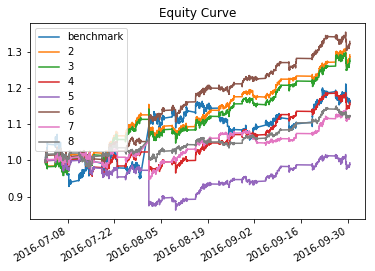

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.332925              0.004053                -0.002766   
1               0.341502              0.003916                -0.002852   
2               0.346000              0.002380                -0.003507   
3               0.342234             -0.000053                -0.003896   
4               0.350087              0.004493                -0.003050   
5               0.361456              0.001874                -0.002596   
6               0.371633              0.001872                -0.002276   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001548                  0.000093             -0.088880   
1                 0.001540                  0.000099             -0.088880   
2                 0.001613                  0.000076             -0.089918   
3                 0.001624                 -0.000004             -0.114892   
4        

In [24]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm, symbol='ru_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()